In [ ]:
# CONNECTING THE COLAB NOTEBOOK TO GOOGLE DRIVE
# Mounting google drive to get files from there
from google.colab import drive
drive.mount('/content/drive')

print('The current working folder is:')
!pwd

# OR DOWNLOAD FROM ANOTHER SOURCE EG IBM AND EXTRACT FROM HERE 
# !wget https://mydeeplearning.s3.us-east.cloud-object-storage.appdomain.cloud/heart%20failure.zip
# !unzip heart_failure.zip
# !pwd 


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
The current working folder is:
/content


In [ ]:
import os

base_dir = '/content/drive/MyDrive/pneucovSars_Dataset'

train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')
test_dir = os.path.join(base_dir, 'test')

# Directory with our training classes
train_covid_dir = os.path.join(train_dir, 'covid')
train_normal_dir = os.path.join(train_dir, 'normal')
train_pneumonia_dir = os.path.join(train_dir, 'pneumonia')


# Directory with our validation classes
validation_covid_dir = os.path.join(validation_dir, 'covid')
validation_normal_dir = os.path.join(validation_dir, 'normal')
validation_pneumonia_dir = os.path.join(validation_dir, 'pneumonia')


# Directory with our test classes
test_covid_dir = os.path.join(test_dir, 'covid')
test_normal_dir = os.path.join(test_dir, 'normal')
test_pneumonia_dir = os.path.join(test_dir, 'pneumonia')


In [ ]:
# CHECKING   A SAMPLE IMAGE FILE NAMES AND THEIR EXTENSIONS IN THE DATASET
train_covid_fnames = os.listdir( train_covid_dir )
train_normal_fnames = os.listdir( train_normal_dir )
train_pneumonia_fnames = os.listdir( train_pneumonia_dir )


print( train_covid_fnames[:10])
print(train_normal_fnames[:10])
print(train_pneumonia_fnames[:10])


['COVID19(432).jpg', 'COVID19(153).jpg', 'COVID19(250).jpg', 'COVID19(378).jpg', 'COVID19(454).jpg', 'COVID19(480).jpg', 'COVID19(486).jpg', 'COVID19(159).jpg', 'COVID19(243).jpg', 'COVID19(376).jpg']
['IM-0459-0001.jpeg', 'NORMAL2-IM-1302-0001.jpeg', 'NORMAL2-IM-0587-0001-0002.jpeg', 'NORMAL2-IM-0899-0001.jpeg', 'NORMAL2-IM-0627-0001.jpeg', 'NORMAL2-IM-0841-0001.jpeg', 'NORMAL2-IM-0939-0001.jpeg', 'NORMAL2-IM-0693-0001.jpeg', 'IM-0143-0001.jpeg', 'NORMAL2-IM-0818-0001-0002.jpeg']
['person1469_bacteria_3827.jpeg', 'person796_virus_1428.jpeg', 'person895_bacteria_2820.jpeg', 'person413_bacteria_1832.jpeg', 'person983_virus_1660.jpeg', 'person606_bacteria_2469.jpeg', 'person500_bacteria_2105.jpeg', 'person1176_virus_1998.jpeg', 'person434_virus_884.jpeg', 'person517_virus_1034.jpeg']


In [ ]:
# ANALYSING THE STATISTIS OF THE TRAINING DATA
print('---------------------- TRAINING IMAGE STATISTICS------------\n')
print('total training covid images :', len(os.listdir( train_covid_dir   ) ))
print('total training normal images :', len(os.listdir( train_normal_dir   ) ))
print('total training pneumonia images :', len(os.listdir( train_pneumonia_dir  ) ))


print('\n---------------------- VALIDATION IMAGE STATISTICS-------------\n')

print('total validation covid images :', len(os.listdir( validation_covid_dir ) ))
print('total validation normal images :', len(os.listdir( validation_normal_dir ) ))
print('total validation pneumonia images :', len(os.listdir( validation_pneumonia_dir ) ))


print('\n---------------------- TEST IMAGE STATISTICS--------------------\n')

print('total test covid images :', len(os.listdir( test_covid_dir ) ))
print('total test normal images :', len(os.listdir( test_normal_dir ) ))
print('total test pneumonia images :', len(os.listdir( test_pneumonia_dir ) ))


---------------------- TRAINING IMAGE STATISTICS------------

total training covid images : 1600
total training normal images : 1610
total training pneumonia images : 1600

---------------------- VALIDATION IMAGE STATISTICS-------------

total validation covid images : 700
total validation normal images : 700
total validation pneumonia images : 700

---------------------- TEST IMAGE STATISTICS--------------------

total test covid images : 13
total test normal images : 13
total test pneumonia images : 13


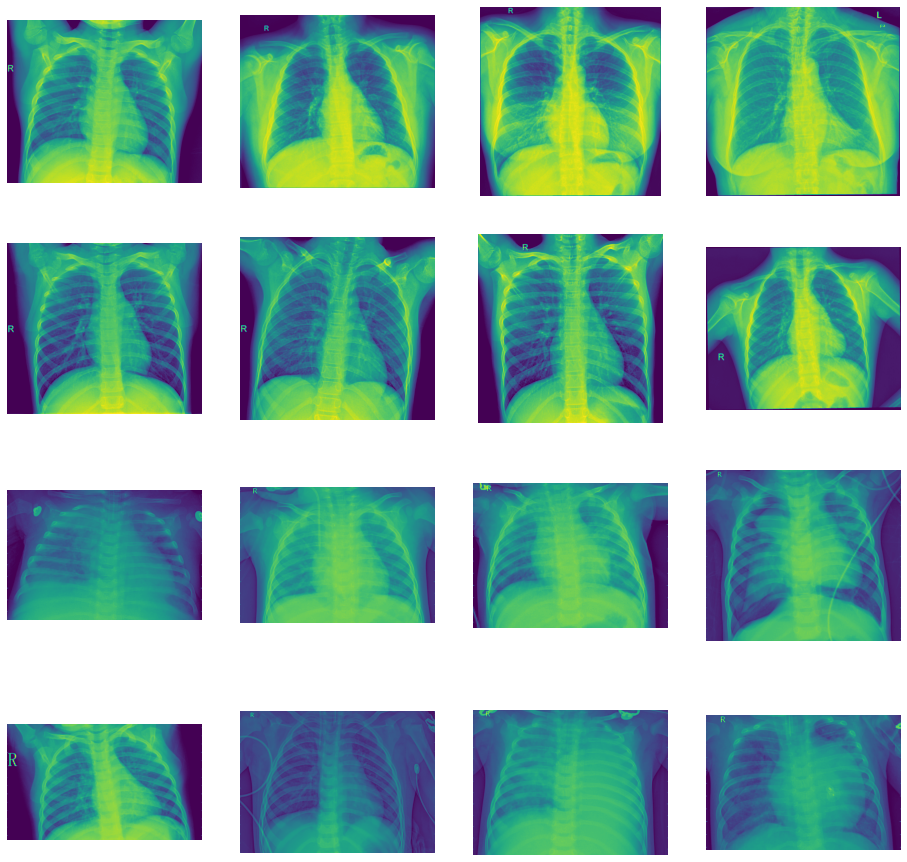

In [ ]:
%matplotlib inline

import matplotlib.image as mpimg
import matplotlib.pyplot as plt

# Parameters for our graph; we'll output images in a 4x4 configuration
nrows = 4
ncols = 4

pic_index = 0 # Index for iterating over images

# VISUALISING SOME IMAGE DATA BEFORE USING IT TO TRAIN THE MODEL(FEATURE EXTRACTOR)
# Set up matplotlib fig, and size it to fit 4x4 pics
fig = plt.gcf()
fig.set_size_inches(ncols*4, nrows*4)

pic_index += 8

next_normal_pix = [os.path.join(train_normal_dir, fname) 
                for fname in train_normal_fnames[ pic_index-8:pic_index] 
               ]

next_pneumonia_pix = [os.path.join(train_pneumonia_dir, fname) 
                for fname in train_pneumonia_fnames[ pic_index-8:pic_index] 
               ]


for i, img_path in enumerate(next_normal_pix + next_pneumonia_pix):
  # Set up subplot; subplot indices start at 1
  sp = plt.subplot(nrows, ncols, i + 1)
  sp.axis('Off') # Don't show axes (or gridlines)

  img = mpimg.imread(img_path)
  plt.imshow(img)

plt.show()

In [ ]:
import tensorflow as tf
import numpy as np

#laying out the structure / layers of the  feature extractor
model = tf.keras.models.Sequential([
    #Note the input shape is the desired size of the image 224x224 with 3 bytes color
    tf.keras.layers.Conv2D(64, (3,3), activation = 'relu', padding='same', input_shape = (224, 224, 1)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64, (3,3), padding='same', activation = 'relu'),
    tf.keras.layers.MaxPooling2D(2,2), 
    tf.keras.layers.Conv2D(128, (3,3), padding='same', activation = 'relu'), 
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(256, (3,3), padding='same', activation = 'relu'), 
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(512, (3,3), padding='same', activation = 'relu'), 
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(1024, (3,3), padding='same', activation = 'relu'), 
    tf.keras.layers.MaxPooling2D(2,2),
    # preventing the problem of overfitting using the Dropout layer
    tf.keras.layers.Dropout(0.4),
    # Flatten the results to feed into a Dense Nueral Network
    tf.keras.layers.Flatten(), 
    # Fully connected layer of 512 neurons.
    tf.keras.layers.Dense(512, activation = 'relu'), 
    tf.keras.layers.Dense(3, activation="softmax") # categorical activation output  
    # tf.keras.layers.Dense(1, activation = 'sigmoid'),
    
])

# Higher Dropout helps in a way that The neurons can't rely on one input because it might be dropped out at 
# random. This reduces bias due to over-relying on one input, bias is a major cause of overfitting.Neurons will
# edundant details  of inputs.

In [ ]:
# GETTING INFORMATION ABOUT THE SUMMARY OF THE MODEL
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 224, 224, 64)      640       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 112, 112, 64)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 112, 112, 64)      36928     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 56, 56, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 56, 56, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 28, 28, 128)      0

In [ ]:
# DATA AUGUMENTATION USING KERAS
# All images will be rescaled by 1./255 after going through the image Generator
# And also performing Data augumentation to enhance the capacity of the dataset.
from tensorflow.keras.preprocessing.image import ImageDataGenerator
# preparing the train image generator with validation
train_datagen = ImageDataGenerator(
     rescale = 1.0/255,
    #  rotation_range = 40,
     width_shift_range = 0.1,
     height_shift_range = 0.1,
    #  shear_range = 0.1,
    #  zoom_range = 0.1,
    #  horizontal_flip = True,
    #  fill_mode = 'nearest'
)

# preparing the validation image generator with augmentation
validation_datagen  = ImageDataGenerator( 
                                      rescale = 1.0/255,
                                    # rotation_range = 40,
                                    width_shift_range = 0.1,
                                    height_shift_range = 0.1,
                                    # shear_range = 0.1,
                                    # zoom_range = 0.1,
                                    # horizontal_flip = True,
                                    # fill_mode = 'nearest'
                          )

# For confusion matrix analysis test data generator is defined as follows.
test_datagen = ImageDataGenerator(rescale=1. / 255)

# ---------------------------------------------------------------------------------
# Flow training images in batches of 300 using train_datagen generator
# ---------------------------------------------------------------------------------
train_generator = train_datagen.flow_from_directory(train_dir,
                                                    batch_size = 100,
                                                    color_mode="grayscale",
                                                    # class_mode = 'binary',
                                                    class_mode  = 'categorical',
                                                    target_size = (224, 224))     
# ----------------------------------------------------------------------------------
# Flow validation images in batches of 100 using test_datagen generator
# ----------------------------------------------------------------------------------
validation_generator =  validation_datagen.flow_from_directory(validation_dir,
                                                         batch_size = 50,
                                                         color_mode="grayscale",
                                                        #  class_mode  = 'binary',
                                                        class_mode  = 'categorical',
                                                         target_size = (224, 224))
# ------------------------------------------------------------------------------------
# Flow test images in batches of 20 using test_datagen generator
# ------------------------------------------------------------------------------------
test_generator =  test_datagen.flow_from_directory(test_dir,
                                                         batch_size = 4,
                                                         color_mode="grayscale",
                                                        #  class_mode  = 'binary',
                                                         class_mode  = 'categorical',
                                                         target_size = (224, 224))

Found 4810 images belonging to 3 classes.
Found 2063 images belonging to 3 classes.
Found 39 images belonging to 3 classes.


In [ ]:
# ANALYSING HOW THE KERAS IMAGE DATAGENERATOR ASSIGNED CLASSES TO OUR IMAGES IN THE DATA GENERATOR
print('---lets see the classes assigned to the train generator by keras.--------')
train_generator.class_indices



---lets see the classes assigned to the train generator by keras.--------


{'covid': 0, 'normal': 1, 'pneumonia': 2}

In [ ]:
# COMPILING THE MODEL WITH THE LOSS FUNCTION TOGETHER WITH AN OPTIMIZER
model.compile(optimizer='adam',loss= tf.keras.losses.CategoricalCrossentropy(),metrics=['accuracy'])
# model.compile( loss = "binary_crossentropy" , optimizer = "adam" , metrics= ['accuracy'])


In [ ]:
# Training to a desired accuracy and quit after reaching that desired accuracy.
# Then with callbacks no need of training the model to very many number of epochs.
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('accuracy')> 0.90):
      print("\nReached 90% accuracy so the  training process is cancelled !")
      self.model.stop_training = True

callbacks = myCallback()

In [ ]:
# FITTING / TRAINING THE MODEL ON THE DATASET
history = model.fit(train_generator,
                    validation_data = validation_generator,
                    batch_size = 100,
                    steps_per_epoch = 48, 
                    epochs = 10, 
                    validation_steps = 42, 
                    verbose = 'auto',
                    callbacks = [callbacks]
            )

Epoch 1/10
 2/48 [>.............................] - ETA: 25:51 - loss: 1.3742 - accuracy: 0.3000

Text(0.5, 1.0, 'Training and validation loss')

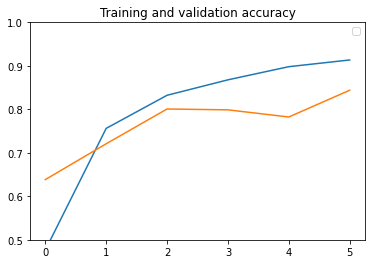

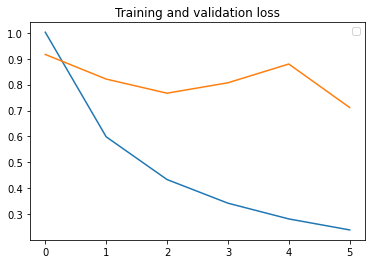

In [ ]:
# VISUALIZATION OF THE PROGRESS OF THE MODEL DURING THE TRAINING PROCESS
import matplotlib.pyplot as plt
#-----------------------------------------------------------
# Retrieve a list of list results on training and test data
# sets for each training epoch
#-----------------------------------------------------------
acc      = history.history[     'accuracy' ]
val_acc  = history.history[ 'val_accuracy' ]

loss     = history.history[    'loss' ]
val_loss = history.history['val_loss' ]

epochs   = range(len(acc)) # Get number of epochs
# print(epochs)
# print(acc)
# print(val_acc)
#------------------------------------------------
# Plot training and validation accuracy per epoch
#------------------------------------------------
plt.plot  ( epochs,     acc )
plt.plot  ( epochs,     val_acc )
plt.ylim([0.5, 1])
plt.legend(loc='upper right')
plt.title ('Training and validation accuracy')
plt.figure()

#------------------------------------------------
# Plot training and validation loss per epoch
#------------------------------------------------
plt.plot  ( epochs,     loss )
plt.plot  ( epochs, val_loss )
plt.legend(loc='upper right')
plt.title ('Training and validation loss'   )

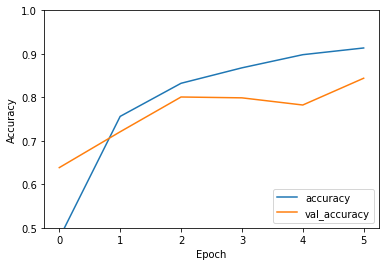

In [ ]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

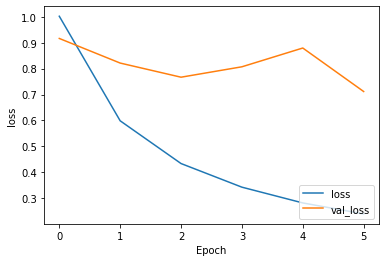

In [ ]:
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label = 'val_loss')
plt.xlabel('Epoch')
plt.ylabel('loss')
plt.legend(loc='lower right')

10/10 [==============================] - 10s 1s/step
Confusion Matrix
[[2 8 3]
 [4 5 4]
 [5 1 7]]


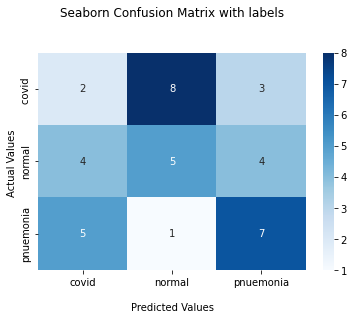

Classification Report
              precision    recall  f1-score   support

       covid       0.18      0.15      0.17        13
      normal       0.36      0.38      0.37        13
   pnuemonia       0.50      0.54      0.52        13

    accuracy                           0.36        39
   macro avg       0.35      0.36      0.35        39
weighted avg       0.35      0.36      0.35        39



In [ ]:
# ANALYSING THE PERFORMANNCE OF THE MODEL USING THE  THE CONFUSION MATRIX TABLE
# importing required dependencies.
import numpy as np
from keras import backend as K
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

batch_size = 4
num_of_test_samples = 13

#Confution Matrix and Classification Report
# validation_generator = validation_generator.reset()
Y_pred = model.predict(test_generator, num_of_test_samples // batch_size+1,  verbose = 'auto')
y_pred = np.argmax(Y_pred, axis=1)
print('Confusion Matrix')
print(confusion_matrix(test_generator.classes, y_pred))

cf_matrix = confusion_matrix(test_generator.classes, y_pred)

ax = sns.heatmap(cf_matrix, annot=True, cmap='Blues')

ax.set_title('Seaborn Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['covid','normal', 'pnuemonia'])
ax.yaxis.set_ticklabels(['covid ','normal', 'pnuemonia'])

## Display the visualization of the Confusion Matrix.
plt.show()


# ----------ANALYSING THE CLASSIFICATION REPORT---------------------
print('Classification Report')
target_names = ['covid', 'normal', 'pnuemonia']
print(classification_report(test_generator.classes, y_pred, target_names=target_names))

In [ ]:
# saving the trained model to the specied path
# model.save("/content/model")

# creates a HDF5 file 'crop_weed_classifier_model.h5 and then saves it'
model.save('PnuemoSarsCov.h5')  

In [ ]:
# converting the trained  model to tensorflowlite model
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()

# save the model 
with open('PneumosarsCov.tflite', 'wb') as f:
  f.write(tflite_model)